given datset plot cluters for k means(hard clustering) and GMM(soft clustering) from sklearn librry directly

In [3]:
import pandas as pd

file_path = "/home/user/manipal/AML/lab6_19thfeb/data/marketing_campaign.csv"

df = pd.read_csv(file_path, sep=';')

print("\n  HEAD  ")
print(df.head())

print("\n  SHAPE  ")
print(df.shape)

print("\n  COLUMNS  ")
print(df.columns)

print("\n  DATA TYPES  ")
print(df.dtypes)

print("\n  MISSING VALUES  ")
print(df.isnull().sum())

print("\n  NUMERICAL SUMMARY  ")
print(df.describe())

print("\nUNIQUE VALUES (Categorical Columns)  ")
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}:")
    print(df[col].value_counts())



  HEAD  
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0    

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

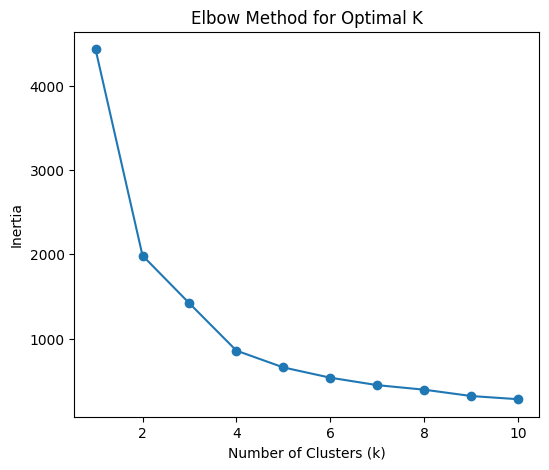

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(
    "/home/user/manipal/AML/lab6_19thfeb/data/marketing_campaign.csv",
    sep=";"
)

print(df.head())

df_numeric = df.select_dtypes(include=[np.number]).dropna()

plot_features = ["Income", "MntWines"]

X_plot = df_numeric[plot_features].values
X_plot = StandardScaler().fit_transform(X_plot)


inertia_values = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_plot)
    inertia_values.append(km.inertia_)

# ----- Elbow Plot -----
plt.figure(figsize=(6,5))
plt.plot(k_range, inertia_values, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()




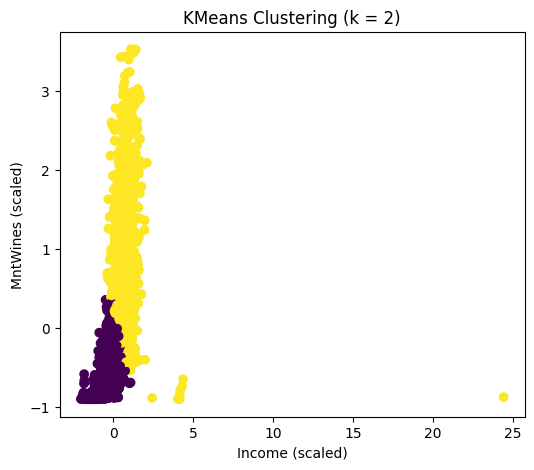

In [ ]:

best_k = 2   

# ----- Final KMeans -----
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_plot)

plt.figure(figsize=(6,5))
plt.scatter(X_plot[:,0], X_plot[:,1], c=kmeans_labels, cmap="viridis")
plt.title(f"KMeans Clustering (k = {best_k})")
plt.xlabel("Income (scaled)")
plt.ylabel("MntWines (scaled)")
plt.show()

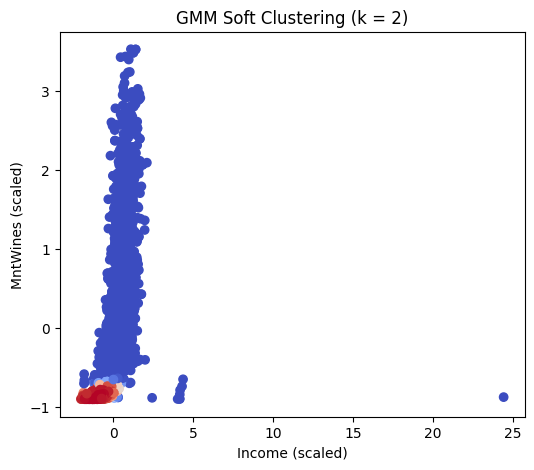

In [10]:

gmm = GaussianMixture(n_components=best_k, random_state=42)
gmm.fit(X_plot)

gmm_labels = gmm.predict(X_plot)
gmm_probs = gmm.predict_proba(X_plot)

plt.figure(figsize=(6,5))
plt.scatter(X_plot[:,0], X_plot[:,1], c=gmm_probs[:,0], cmap="coolwarm")
plt.title(f"GMM Soft Clustering (k = {best_k})")
plt.xlabel("Income (scaled)")
plt.ylabel("MntWines (scaled)")
plt.show()
